# To do list & python pratice

Ersen'S Joseph 

**General goal:**
1. Read data in python including read several data from a folder
1. Make plots

**To-do list:** (specify a region)
- [x] Read data (one and sevarl)
- [x] Plot (SLA, SST)
- [x] Save plots
- [x] Set a range in bar graph
- [x] Plot vectors
- [x] plot more than one variable in a single figure 
- [x] Select a region automatically
- [x] Create for loop
- [x] download global dataset (SST...)
- [x] Subplot (oceanography type related plot)
- [x] Make video out of plots or visualize the trajectories
- [ ] Fix SST scale 
- [ ] Write the date on the figures as text (title) 
- [ ] Read data from the cloud

In [105]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs                   #import projections
import cartopy
import gsw
import cftime

In [106]:
%matplotlib inline  
#%matplotlib qt5 
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

In [107]:
#file = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#directory = '../Data1/*.nc'
#file = '../Data/SLA/20190701-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'
#file = '../Data/dataset-duacs-nrt(7:10:219).nc'
#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#file = '../Data/Data/SLA/20210706-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'
#file = '../Data//20190708-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'

#directory = '../Data1/*.nc'
#file = '/Users/lfp/Desktop/try/20190629120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc'
file = '/Users/lfp/Desktop/try/RSS_AMSR2_ocean_L3_weekly_2019-01-05_v08.2.nc'


In [108]:
ds = xr.open_dataset(file)

In [109]:
#ds = xr.open_mfdataset(directory)

In [110]:
ds

<xarray.Dataset>
Dimensions:             (lon: 1440, lat: 720)
Coordinates:
  * lon                 (lon) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Data variables:
    SST                 (lat, lon) float32 ...
    wind_speed_LF       (lat, lon) float32 ...
    wind_speed_MF       (lat, lon) float32 ...
    wind_speed_AW       (lat, lon) float32 ...
    water_vapor         (lat, lon) float32 ...
    cloud_liquid_water  (lat, lon) float32 ...
    rain_rate           (lat, lon) float32 ...
    land_mask           (lat, lon) int8 ...
    sea_ice_mask        (lat, lon) int8 ...
    coast_mask          (lat, lon) int8 ...
    noobs_mask          (lat, lon) int8 ...
Attributes: (12/43)
    Conventions:                   CF-1.6
    title:                         RSS AMSR2 V8.2 Air-Sea Essential Climate V...
    summary:                       RSS climate quality air-sea products (SST,...
    version:                       8.2
    processing_level:              Level 3: weekly maps
    history:                       created by RSS
    ...                            ...
    geospatial_lon_max:            360.0
    geospatial_lon_resolution:     0.25
    geospatial_lon_units:          degrees_east
    references:                    Source_of_AMSR2_radiometer_observations: J...
    averaging_procedure:           observations averaged over specified time_...
    acknowledgement:               AMSR2 AS-ECVs are produced by Remote Sensi...

In [111]:
#ds = ds.sel(lon=slice(80,100),lat=slice(5,25))

In [112]:
sst = ds.SST

In [113]:
#ds.sea_surface_temperature.mean('time').plot(robust=True)

In [114]:
# figure saving
__figdir__ = '../plots/' + 'BoB 7-22-2019'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'
# define savefig if we want to use if savefig 
savefig = 1

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_20544/118416770.py:16: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


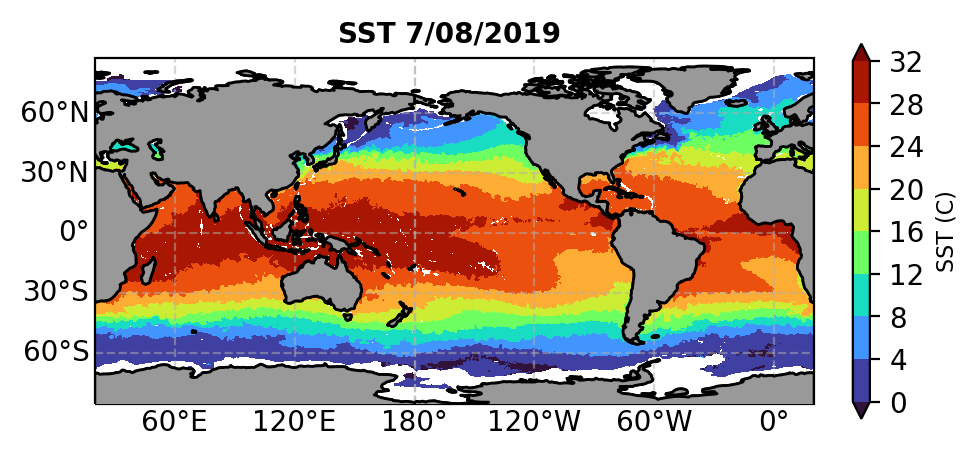

In [116]:
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('SST 7/08/2019 ', fontsize=10, fontweight='bold')

plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
    
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False

levels = 10 #related to dataframe

cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())

#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SST (C)',fontsize = 8)
ax.coastlines()
#Plot coast
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

if savefig:

    plt.savefig(__figdir__+'_SST'+'.'+plotfiletype,**savefig_args)

In [13]:
# figure saving
__figdir__ = '../plots/' + 'BoB 7-22-2019'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'
# define savefig if we want to use if savefig 
savefig = 1

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_14200/3205831068.py:13: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


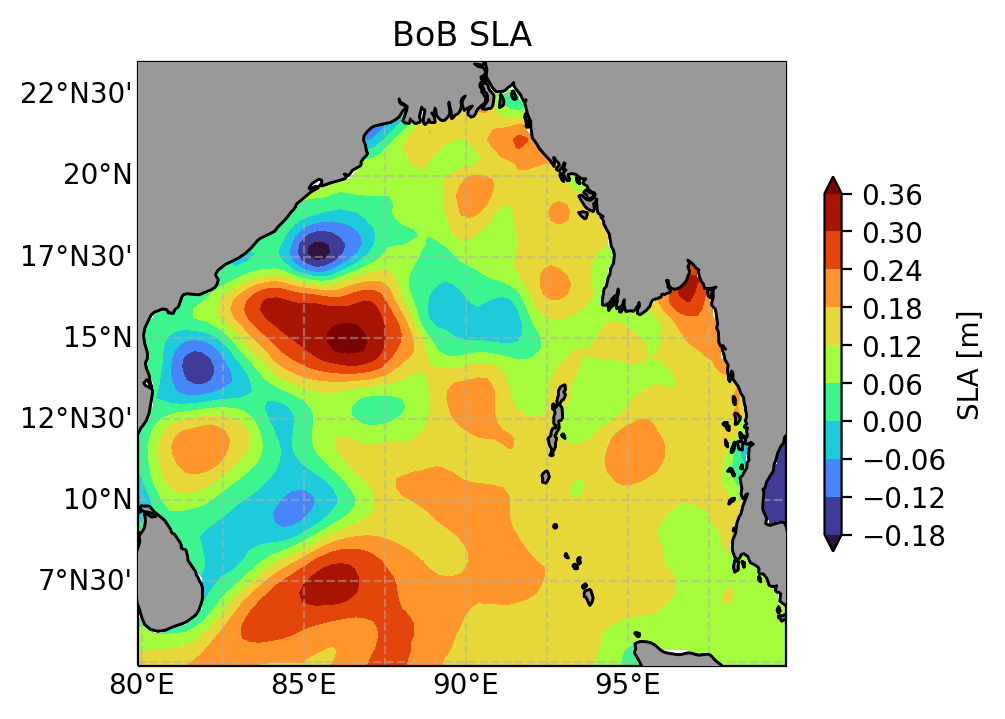

In [16]:
timeindex = 1
ax1 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax1.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10
cs = ax1.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)



l;;l
cb.set_label('SLA [m]',fontsize = 10)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

if savefig:

    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_50440/3324067954.py:11: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')
/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_50440/3324067954.py:30: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


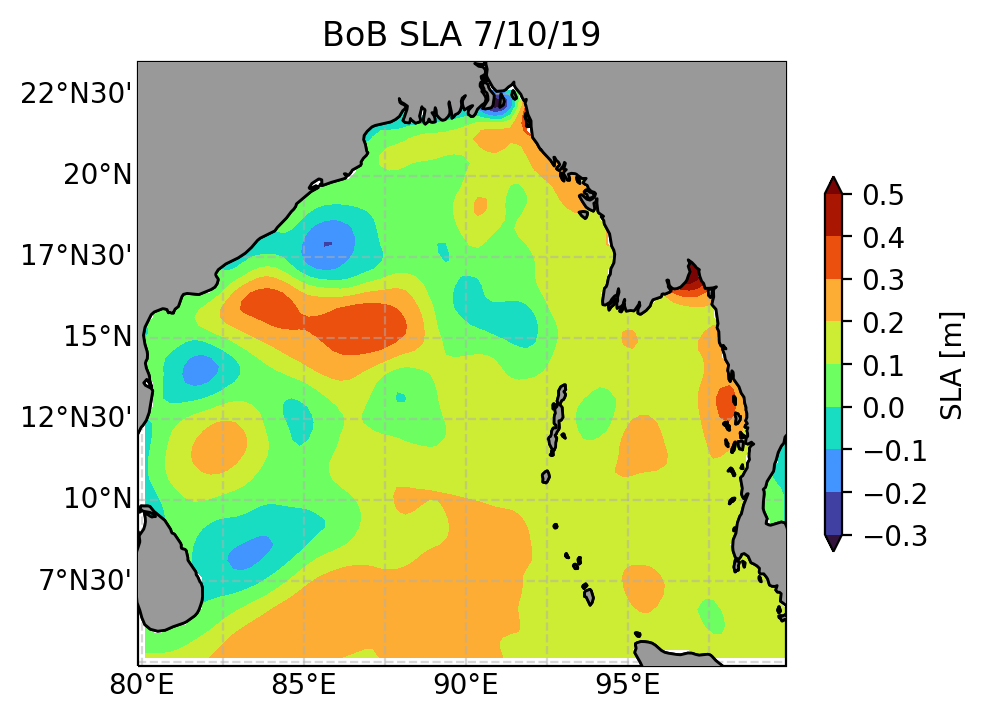

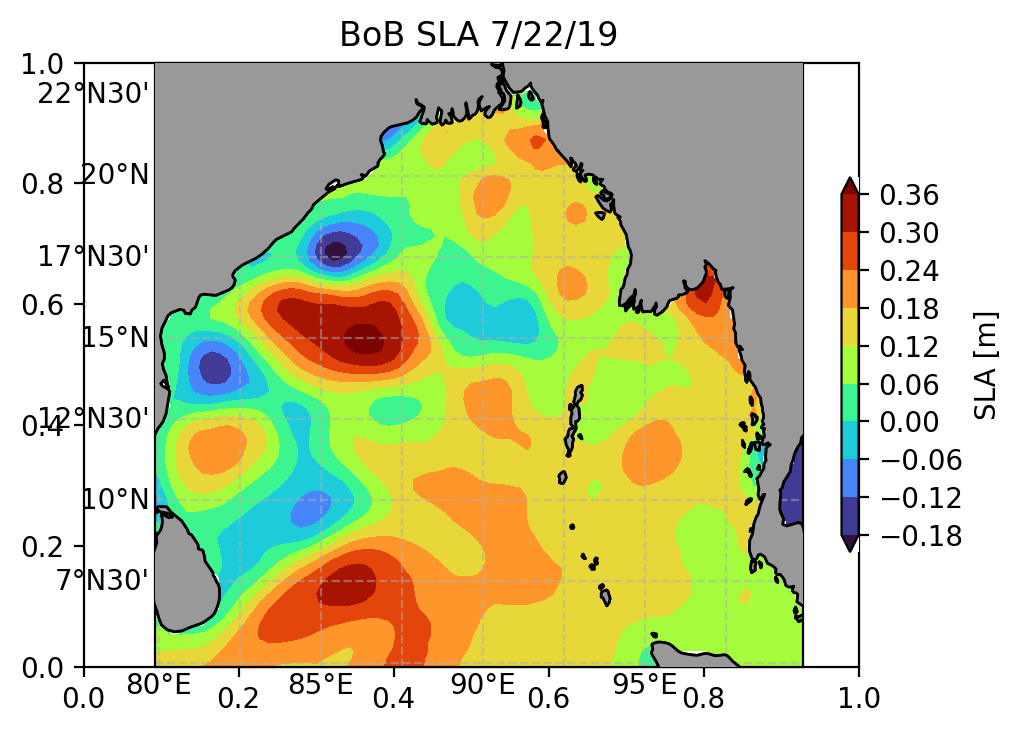

In [135]:

timeindex = 0
ax0 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))
ax0.set_title('BoB SLA 7/10/19')

gl = ax0.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10

cs = ax0.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax0.coastlines()
ax0.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

plt.subplots()
#fig.tight_layout(pad=50.0)
#----------------------------------------------------------------------------------------------
timeindex = 1
ax1 = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))
ax1.set_title('BoB SLA 7/22/19')

plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10

cs = ax1.contourf(ds.longitude,ds.latitude,np.squeeze(sla[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')


In [15]:
def plot_variables(longitude,latitude,sla):
    
    cs = ax.contourf(longitude,latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
    
    ax.set_title('BoB SLA')
    

    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False
    levels = 10
    cs = ax.contourf(longitude,latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
    
    
    
    cb.set_label('SLA [m]',fontsize = 10)
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

    return ax,gl,cs,cb 
    
    
    

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

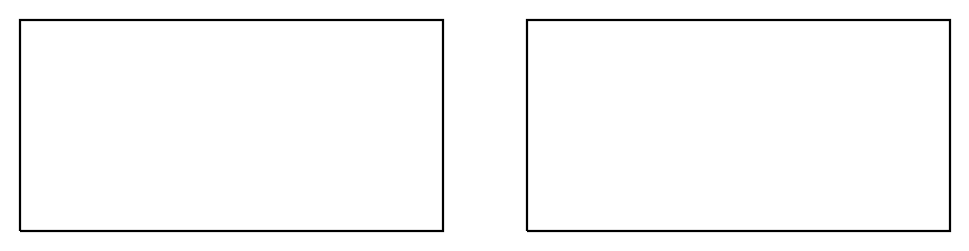

In [16]:
fig,axes = plt.subplots(1,2, subplot_kw = {'projection' : ccrs.PlateCarree(central_longitude=200)}, figsize = (6,8))
                       
                       
plot_variables(ds.longitude,ds.latitude,sla,axes[1,1])
                       